# Part 1
Go to the eurostat website and try to find a dataset that includes the european unemployment rates at a recent date.

Use this data to build a Choropleth map which shows the unemployment rate in Europe at a country level. Think about the colors you use, how you decided to split the intervals into data classes or which interactions you could add in order to make the visualization intuitive and expressive. 
Compare Switzerland's unemployment rate to that of the rest of Europe.

In [185]:
import folium,json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [186]:
EUROSTAT_UNEMPLOYMENT_TIPSUN20_DATASET = 'Eurostat_tipsun20.xls'
SWISS_UNEPMLOYMENT_DATASET = 'TauxdechomageSuisse.csv'
EUROPE_JSON = r'europe.geojson' # from https://github.com/leakyMirror/map-of-europe/blob/master/GeoJSON/europe.geojson



 The unemployment rate is the number of unemployed persons expressed as a percentage of the labour force, based on the International Labour Office (ILO) definition.
 
 Info about choosen dataset:
 Unemployment rate - annual data
 We used the following dataset : http://ec.europa.eu/eurostat/web/products-datasets/-/tipsun20
 
 Hyperlink to the table: http://ec.europa.eu/eurostat/tgm/table.do?tab=table&init=1&plugin=1&language=en&pcode=tipsun20

 Code: tipsun20
 
 Last update:31.10.2017


In [187]:
unemploymentRates_full = pd.read_excel(open(EUROSTAT_UNEMPLOYMENT_TIPSUN20_DATASET,'rb'), sheetname='Sheet0') #,index_col='Country'
unemploymentRates_full

,Country,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Belgium,9.7,9.5,9.2,9.3,8.4,6.9,6.6,7.5,8.2,...,7.5,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8
1,Bulgaria,:,:,:,:,:,16.4,19.6,18.2,13.7,...,6.9,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6
2,Czech Republic,4,3.9,4.8,6.5,8.7,8.8,8.1,7.3,7.8,...,5.3,4.4,6.7,7.3,6.7,7.0,7.0,6.1,5.1,4.0
3,Denmark,6.7,6.3,5.2,4.9,5.2,4.3,4.5,4.6,5.4,...,3.8,3.4,6.0,7.5,7.6,7.5,7.0,6.6,6.2,6.2
4,Germany,8.2,8.9,9.6,9.4,8.6,7.9,7.8,8.6,9.7,...,8.5,7.4,7.6,7.0,5.8,5.4,5.2,5.0,4.6,4.1
5,Estonia,:,:,:,:,:,14.6,13.0,11.2,10.3,...,4.6,5.5,13.5,16.7,12.3,10.0,8.6,7.4,6.2,6.8
6,Ireland,12.3,11.7,9.9,7.5,5.6,4.3,3.9,4.5,4.6,...,4.7,6.4,12.0,13.9,14.7,14.7,13.1,11.3,9.4,7.9
7,Greece,:,:,:,11.1,12,11.2,10.7,10.3,9.7,...,8.4,7.8,9.6,12.7,17.9,24.5,27.5,26.5,24.9,23.6
8,Spain,20.7,19.9,18.4,16.4,13.6,11.9,10.6,11.5,11.5,...,8.2,11.3,17.9,19.9,21.4,24.8,26.1,24.5,22.1,19.6
9,France,10.2,10.5,10.7,10.3,10,8.6,7.8,7.9,8.5,...,8.0,7.4,9.1,9.3,9.2,9.8,10.3,10.3,10.4,10.1


We decide to remove all columnns containing missing values. It turns out it only concerns the earlier years (from 1995 to 1999). We consider that, for the granted task, it's ok to omit those columns and there is enough data and most importantly they are continous in time. So we don't alter any eventual pattern.
Also imputing those missing values would be delicate as the situation for each country can vary widely in a year.

In [193]:
unemploymentRates= unemploymentRates_full[[column for column in unemploymentRates_full.columns if '199' not in column]]
unemploymentRates['average'] = unemploymentRates.mean(axis=1)


/Users/Sina-Mac/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# Comparaison with swiss part

For the swiss unemployement rates, we take the data from armstat, as in part 2. But here we are not interested in Cantons. We then add the information over the selected number of years (to match the european dataset) and we add a row to the european dataset.
We then sort the dataset  increasing average unemployment rate over the period from 2000 to 2016.
Of course Switzerland is the best ! 

In [194]:

df = pd.read_csv(SWISS_UNEPMLOYMENT_DATASET, encoding='utf-16').T
df[0] =  df[0].apply(lambda x: re.sub("[^0-9]", "", x))
df = df.apply(pd.to_numeric, errors='ignore')

swiss  = df.groupby(0).mean()
swissUnemploymentRates = [item for sublist in swiss.values[7:24] for item in sublist]
swissUnemploymentRates.extend([np.mean(swissUnemploymentRates)])
swissrow= ['Switzerland'] + swissUnemploymentRates 
unemploymentRates.loc[-1] = swissrow
unemploymentRates= unemploymentRates.sort_values(['average'], ascending=True)
unemploymentRates



/Users/Sina-Mac/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,average
-1,Switzerland,1.833333,1.7,2.55,3.691667,3.883333,3.758333,3.333333,2.775,2.558333,3.716667,3.508333,2.85,2.908333,3.15,3.041667,3.166667,3.316667,3.043627
15,Luxembourg,2.200000,1.9,2.60,3.800000,5.000000,4.600000,4.600000,4.200,4.900000,5.100000,4.600000,4.80,5.100000,5.90,6.000000,6.500000,6.300000,4.594118
19,Austria,3.900000,4.0,4.40,4.800000,5.500000,5.600000,5.300000,4.900,4.100000,5.300000,4.800000,4.60,4.900000,5.40,5.600000,5.700000,6.000000,4.988235
18,Netherlands,3.700000,3.1,3.70,4.800000,5.700000,5.900000,5.000000,4.200,3.700000,4.400000,5.000000,5.00,5.800000,7.30,7.400000,6.900000,6.000000,5.152941
3,Denmark,4.300000,4.5,4.60,5.400000,5.500000,4.800000,3.900000,3.800,3.400000,6.000000,7.500000,7.60,7.500000,7.00,6.600000,6.200000,6.200000,5.576471
27,United Kingdom,5.400000,5.0,5.10,5.000000,4.700000,4.800000,5.400000,5.300,5.600000,7.600000,7.800000,8.10,7.900000,7.50,6.100000,5.300000,4.800000,5.964706
17,Malta,6.700000,7.6,7.00,7.600000,7.200000,6.900000,6.800000,6.500,6.000000,6.900000,6.900000,6.40,6.300000,6.40,5.800000,5.400000,4.700000,6.535294
2,Czech Republic,8.800000,8.1,7.30,7.800000,8.300000,7.900000,7.100000,5.300,4.400000,6.700000,7.300000,6.70,7.000000,7.00,6.100000,5.100000,4.000000,6.758824
22,Romania,7.600000,7.4,8.30,7.700000,8.000000,7.100000,7.200000,6.400,5.600000,6.500000,7.000000,7.20,6.800000,7.10,6.800000,6.800000,5.900000,7.023529
23,Slovenia,6.700000,6.2,6.30,6.700000,6.300000,6.500000,6.000000,4.900,4.400000,5.900000,7.300000,8.20,8.900000,10.10,9.700000,9.000000,8.000000,7.123529


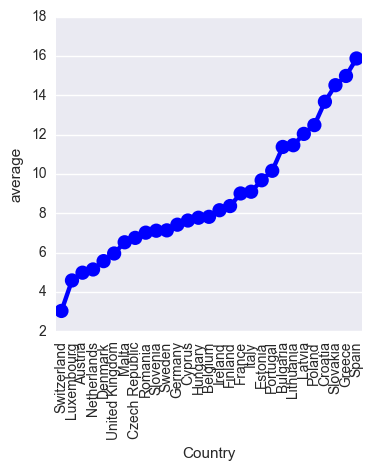

In [195]:
g= sns.factorplot(x="Country", y="average", data=unemploymentRates,color='b');
plt.xticks(rotation=90, fontsize = 10)
plt.show()

In [7]:
geo_json_data = json.load(open(EUROPE_JSON))
features = geo_json_data['features'][0]
print(features.keys())
print(features['properties'].keys())
print(geo_json_data['features'][32]['properties']['NAME'])

dict_keys(['geometry', 'properties', 'type'])
dict_keys(['FID', 'NAME', 'SUBREGION', 'ISO3', 'UN', 'FIPS', 'LON', 'LAT', 'ISO2', 'AREA', 'REGION', 'POP2005'])
Monaco


In [32]:
EU_coordinates = [54.526,15.2551] #y,x
m_europe = folium.Map(EU_coordinates, tiles='cartodbpositron', zoom_start=3.6)
geo_json_data = json.load(open(EUROPE_JSON))

m_europe.choropleth(geo_data= EUROPE_JSON,
                    data=unemploymentRates,
                    columns=['Country', 'average'],
                    key_on='feature.properties.NAME',
                    fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
                    legend_name='Unemployment Rate (%)'
                   )
m_europe.save('UnemploymentEurope.html')

from IPython.display import IFrame
IFrame(src='UnemploymentEurope.html', width=860, height=450)

# Bonus part

As we could not find any json for Rostigraben, we had two solutions: make one ourself or use some tricks with the existing data and information about Rostigraben. We opted for the latter.

We choose to ignore Romansch part as there is no Romansch canton.

In [34]:
import matplotlib.pyplot as plt


German_side=[] # added below
French_Side=['GE','VD','FR','NE','JU']
Italian_Side=['TI']
for canton in DF_plot['id'].values:
    if not((canton in Italian_Side) or (canton in French_Side)):
        German_side.append(canton)

# We remove the two cantons that are shared between different Rosti sides
German_side.remove('VS')
German_side.remove('GR')
RostiSides=['German','French','Italian']

total= [0,0,0] 

DF_plot['average'] = DF_plot.mean(axis=1)

for canton in DF_plot['id'].values:
    if(canton in German_side):
        total[0] += DF_plot.loc[DF_plot['id']==canton,'average'].values[0]
    elif(canton in French_Side):
        total[1] += DF_plot.loc[DF_plot['id']==canton,'average'].values[0]
    elif(canton in Italian_Side):
        total[2] += DF_plot.loc[DF_plot['id']==canton,'average'].values[0]
    else:
        print('canton ', canton, ' was ignored.')
total_normalized = [total[0]/len(German_side), total[1]/len(French_Side), total[2]/len(Italian_Side) ]
pd.Series(total_n,index=RostiSides).plot.pie()
plt.show()

1


We can observe that, on average and with the hypotheses we have made, the German side has the lowest  unemployment rates (2.27%), followed by italian part (3.35%) and the french side (4.61)%.